# San Francisco Public Library patron dataset 

In [10]:
# this will only work if you first 'conda install geopandas' through Anaconda prompt. pip install works too. Require to run Anaconda prompt as adminitrator (that's right click at Anaconda prompt )
import geopandas as gpd
import descartes

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Dataset

In [12]:
df=pd.read_csv("data/Library_Usage.csv")

In [13]:
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,July,2016,p,phone,False,2003,False,9.0
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423448 entries, 0 to 423447
Data columns (total 15 columns):
Patron Type Code                423448 non-null int64
Patron Type Definition          423448 non-null object
Total Checkouts                 423448 non-null int64
Total Renewals                  423448 non-null int64
Age Range                       423233 non-null object
Home Library Code               423408 non-null object
Home Library Definition         423448 non-null object
Circulation Active Month        423448 non-null object
Circulation Active Year         423448 non-null object
Notice Preference Code          423448 non-null object
Notice Preference Definition    423448 non-null object
Provided Email Address          423448 non-null bool
Year Patron Registered          423448 non-null int64
Outside of County               423448 non-null bool
Supervisor District             313138 non-null float64
dtypes: bool(2), float64(1), int64(4), object(8)
memory usage: 42.8+ MB

In [7]:
df.describe()
# only five numerical values. Patron Type Code, Supervisor District are technically factorial. Year Patron is interval, but can be used to calculate how many years a patron has a library card.

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000
mean,1.036765,161.982097,59.657327,2010.348917,6.288240
std,4.188198,453.703678,225.009917,4.357374,3.123634
min,0.000000,0.000000,0.000000,2003.000000,1.000000
25%,0.000000,2.000000,0.000000,2007.000000,4.000000
50%,0.000000,19.000000,2.000000,2012.000000,6.000000
75%,1.000000,113.000000,27.000000,2014.000000,9.000000
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000


In [15]:
df.isnull().sum().sort_values(ascending=False)


Supervisor District             110310
Age Range                          215
Home Library Code                   40
Outside of County                    0
Year Patron Registered               0
Provided Email Address               0
Notice Preference Definition         0
Notice Preference Code               0
Circulation Active Year              0
Circulation Active Month             0
Home Library Definition              0
Total Renewals                       0
Total Checkouts                      0
Patron Type Definition               0
Patron Type Code                     0
dtype: int64

Clearly, Three variables - Supervisor District, Age Range, and Home Library Code- have missing values. Supervisor District is missing in approx. 25% of the dataset, so these records definitely could not be imputated. It is worth looking into why such the number is so big. 
Age Range, Home Library County is small enough, so it can be considered to be imputated. We will do it if we are using these for prediction

 "Supervisor District" is an automatically populated fields and will be left blank for users who are outside of country. That will explain high volume of null values in this particular field.  
From literature review, I found out that San Francisco Public Library (SFPL) considers equity and social justice as their service priority. They welcome patrons without fixed address - individuals who are homeless - to use their facilities.If the patron record without supervisor district indeed signifies that these are records from vulnerable population, it may be interesting to to run a Z-test to examine some of numerical variables, and/or chi-test to examine categorical variables.  
As a library professional, I really admire how SFPL deems serving the vulnerable population as part of their mandate. It also reminds me that, while it is important for libraries to show its values by using numbers and statistics - such as usage stats like total checkouts - part of its true value in the society is in providing services to those who are in need. The weakness of this particular dataset is that it only reflects the usage of those patrons who borrow materials form the library.  

## Dependent Variables 

### Categorical Variables



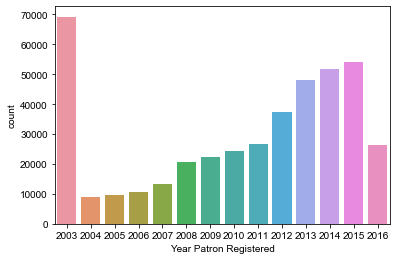

In [38]:
sns.countplot(x='Year Patron Registered',data=df)
sns.set(rc={'figure.figsize':(11.7,8.27)})

The year "2003" is likely the year records got imported from old system to new system, so it is not suprised that this category would have a high count. 2016 data is likely to be incomplete, and hence does not reflect the trend. 
From this count plot, it looks like there is an increase in membership over the span of ten years. 
This is likely to be due to population growth, opening of new branches to cover a bigger geographical area, and, possibly, growing interest in using the library. 

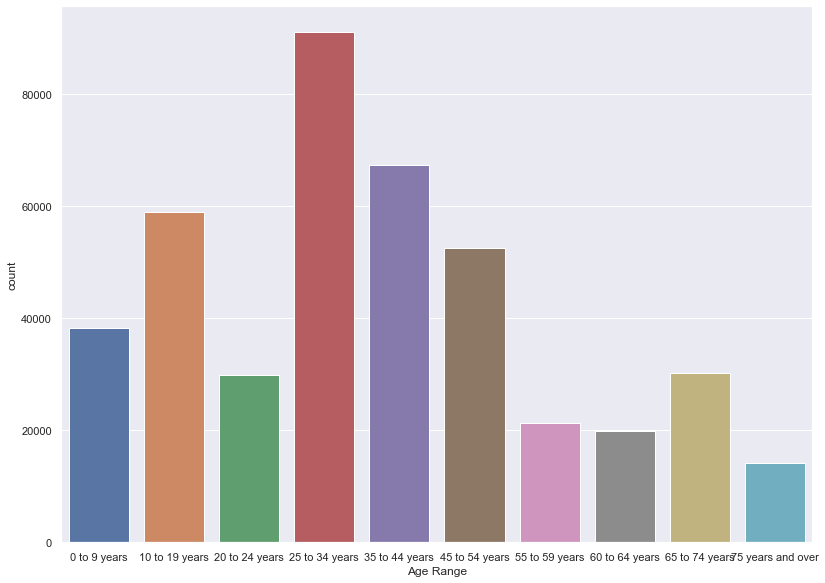

In [91]:
sns.countplot(x='Age Range',order=('0 to 9 years','10 to 19 years','20 to 24 years','25 to 34 years','35 to 44 years','45 to 54 years', '55 to 59 years','60 to 64 years','65 to 74 years','75 years and over'),data=df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

At the first glance, it looks like the data is not normally distributed. However, note that the intervals are not the same: the width varies from 5 years to 10 years. Because of this, this is not a histrogram that could be used to determine whether there is any skewness in the data. 

NameError: name 'ax' is not defined

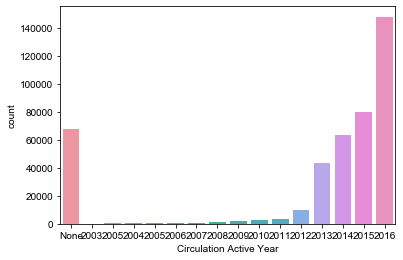

In [18]:
sns.countplot(x="Circulation Active Year",hue_order='Supervisor District',order=('None','2003','2005','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016'),data=df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
ax.set_title('Countplot for Circulation Active Year') 
plt.tight_layout()
plt.show()

This is interesting to see that most of the users have used the library in the past one year ("2016") or perhaps ("2015") 

In [26]:
df['avg cko']=df['Total Checkouts']/(2016-df['Year Patron Registered'])
df.head()

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Outside of County,Supervisor District,avg cko
0,0,ADULT,1092,761,60 to 64 years,M6,Mission,July,2016,p,phone,False,2003,False,9.0,84.000000
1,0,ADULT,0,0,20 to 24 years,P1,Park,None,None,z,email,True,2014,False,5.0,0.000000
2,0,ADULT,31,22,25 to 34 years,S7,Sunset,April,2016,z,email,True,2010,False,4.0,5.166667
3,0,ADULT,0,0,45 to 54 years,P1,Park,None,None,a,print,False,2016,True,NaN,NaN
4,0,ADULT,0,0,25 to 34 years,X,Main Library,None,None,z,email,True,2015,False,3.0,0.000000


In [27]:
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Year Patron Registered,Supervisor District,avg cko
count,423448.000000,423448.000000,423448.000000,423448.000000,313138.000000,4.110210e+05
mean,1.036765,161.982097,59.657327,2010.348917,6.288240,inf
std,4.188198,453.703678,225.009917,4.357374,3.123634,NaN
min,0.000000,0.000000,0.000000,2003.000000,1.000000,0.000000e+00
25%,0.000000,2.000000,0.000000,2007.000000,4.000000,1.000000e+00
50%,0.000000,19.000000,2.000000,2012.000000,6.000000,5.333333e+00
75%,1.000000,113.000000,27.000000,2014.000000,9.000000,2.412500e+01
max,104.000000,35907.000000,8965.000000,2016.000000,11.000000,inf


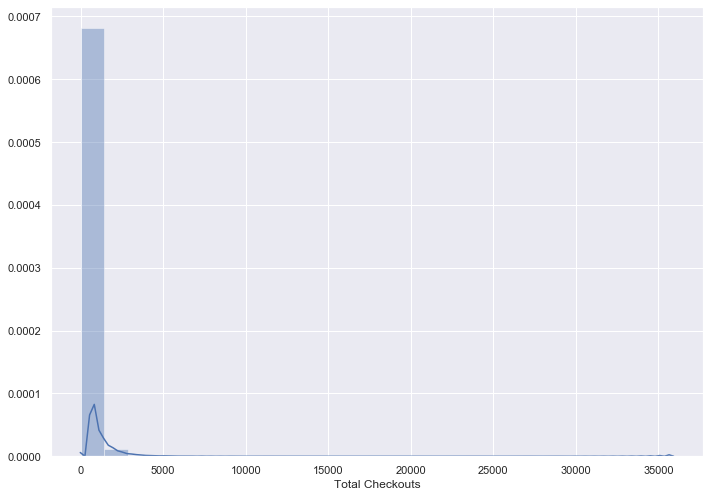

In [32]:
sns.distplot(df['Total Checkouts'],bins=25)


(0, 500)

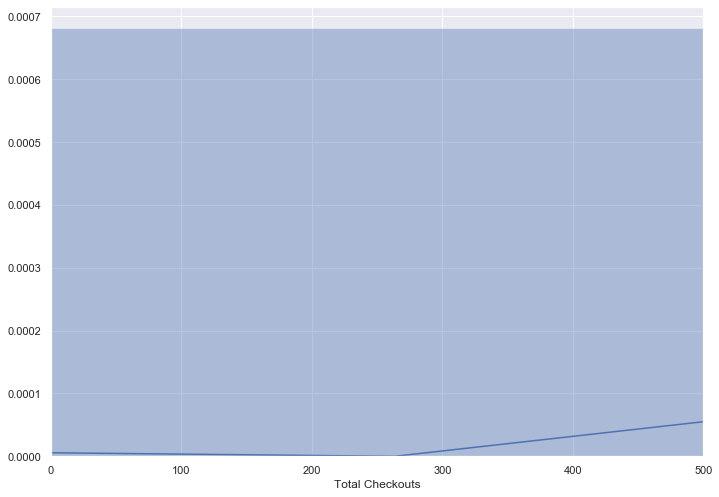

In [38]:
sns.distplot(df['Total Checkouts'],bins=25)
plt.xlim(0,500)

In [ ]:
outliers=df[df['Total Checkouts']>5000]
print(outliers)

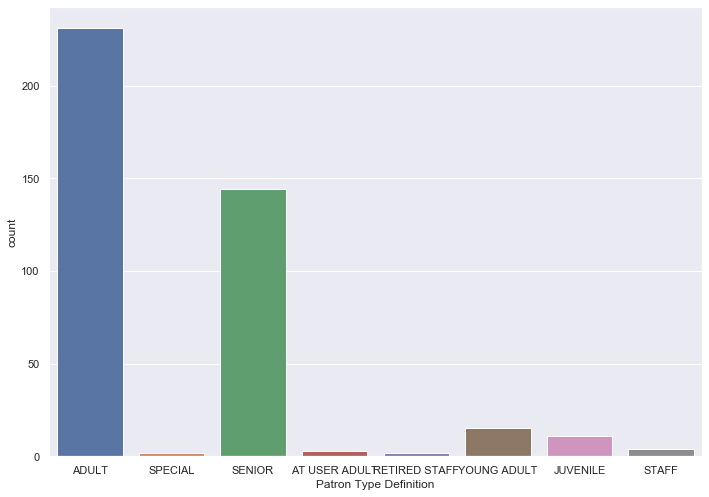

In [36]:
sns.countplot(x='Patron Type Definition',data=outliers)
plt.show()

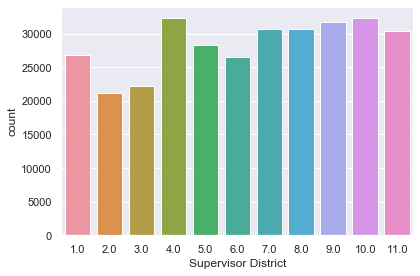

In [52]:
sns.countplot(x='Supervisor District',data=df)
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)
plt.tight_layout()
plt.show()

In [29]:
gdf = gpd.read_file('data/Shapefile/geo_export.shp')
print(gdf)

    supname  supervisor numbertext                    supdist  \
0   Farrell         2.0        TWO   SUPERVISORIAL DISTRICT 2   
1       Mar         1.0        ONE   SUPERVISORIAL DISTRICT 1   
2      Tang         4.0       FOUR   SUPERVISORIAL DISTRICT 4   
3       Yee         7.0      SEVEN   SUPERVISORIAL DISTRICT 7   
4    Wiener         8.0      EIGHT   SUPERVISORIAL DISTRICT 8   
5    Avalos        11.0     ELEVEN  SUPERVISORIAL DISTRICT 11   
6    Campos         9.0       NINE   SUPERVISORIAL DISTRICT 9   
7     Cohen        10.0        TEN  SUPERVISORIAL DISTRICT 10   
8       Kim         6.0        SIX   SUPERVISORIAL DISTRICT 6   
9      Chiu         3.0      THREE   SUPERVISORIAL DISTRICT 3   
10    Breed         5.0       FIVE   SUPERVISORIAL DISTRICT 5   

                                             geometry  
0   POLYGON ((-122.41922 37.80845, -122.41921 37.8...  
1   POLYGON ((-122.49374 37.78761, -122.49367 37.7...  
2   POLYGON ((-122.47485 37.76179, -122.47496 37.7.

In [30]:
# %matplotlib inline
#gdf.plot()

In [31]:
gdf2 = gpd.read_file('data/Shapefile/Supervisor Districts as of April 2012/geo_export_2012.shp')

In [32]:
print(gdf2)

    supname  supervisor numbertext                    supdist  \
0   Farrell         2.0        TWO   SUPERVISORIAL DISTRICT 2   
1       Mar         1.0        ONE   SUPERVISORIAL DISTRICT 1   
2      Tang         4.0       FOUR   SUPERVISORIAL DISTRICT 4   
3       Yee         7.0      SEVEN   SUPERVISORIAL DISTRICT 7   
4    Wiener         8.0      EIGHT   SUPERVISORIAL DISTRICT 8   
5    Avalos        11.0     ELEVEN  SUPERVISORIAL DISTRICT 11   
6    Campos         9.0       NINE   SUPERVISORIAL DISTRICT 9   
7     Cohen        10.0        TEN  SUPERVISORIAL DISTRICT 10   
8       Kim         6.0        SIX   SUPERVISORIAL DISTRICT 6   
9      Chiu         3.0      THREE   SUPERVISORIAL DISTRICT 3   
10    Breed         5.0       FIVE   SUPERVISORIAL DISTRICT 5   

                                             geometry  
0   POLYGON ((-122.41922 37.80845, -122.41921 37.8...  
1   POLYGON ((-122.49374 37.78761, -122.49367 37.7...  
2   POLYGON ((-122.47485 37.76179, -122.47496 37.7.

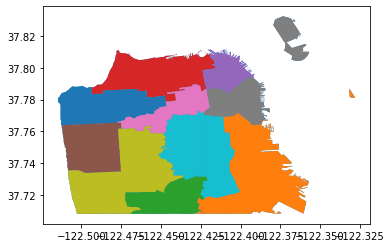

In [33]:
#import matplotlib.pyplot as plt
f, ax = plt.subplots(1)
gdf.plot(ax=ax)
gdf2.plot(ax=ax,column='supdist',cmap=None,)


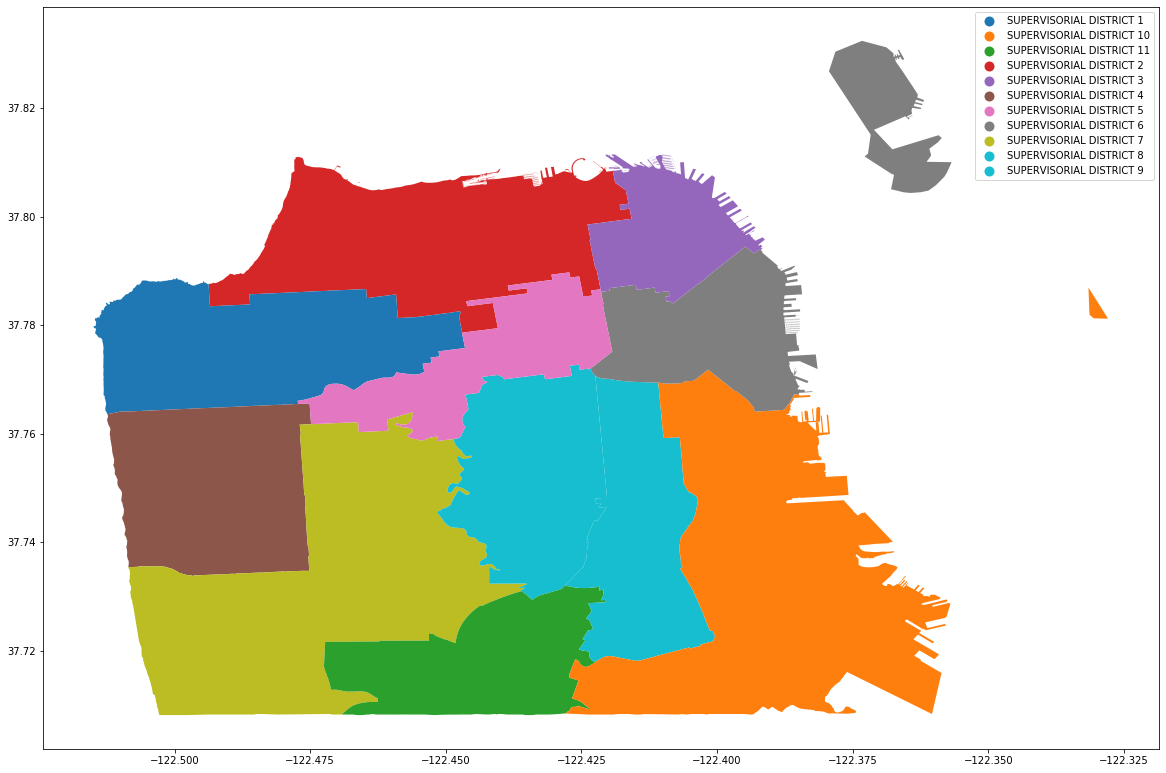

In [34]:

gdf.plot(column='supdist', cmap=None, legend=True, figsize=(20, 20))